In [3]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carrega a base de dados California Housing
california = fetch_california_housing()
dt = pd.DataFrame(california.data, columns=california.feature_names)
dt['medv'] = california.target  # Valor médio das casas em centenas de milhares

In [5]:
print(f"Forma do dataset: {dt.shape}")
print("\nPrimeiras linhas do dataset:")
print(dt.head())

Forma do dataset: (20640, 9)

Primeiras linhas do dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   medv  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


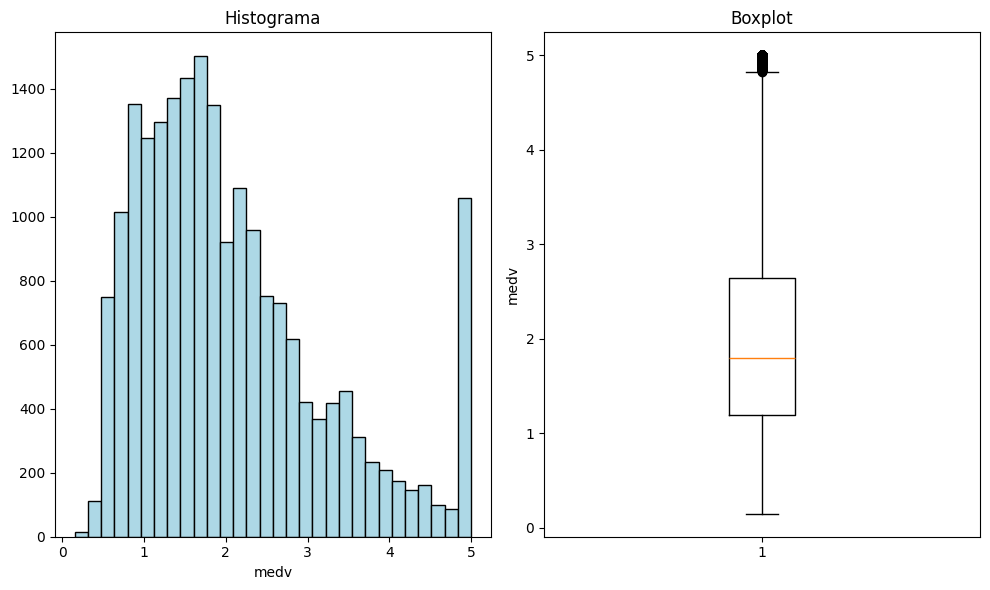

In [6]:
# Análise exploratória
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(dt['medv'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('medv')
plt.title('Histograma')

plt.subplot(1, 2, 2)
plt.boxplot(dt['medv'])
plt.ylabel('medv')
plt.title('Boxplot')
plt.tight_layout()
plt.show()

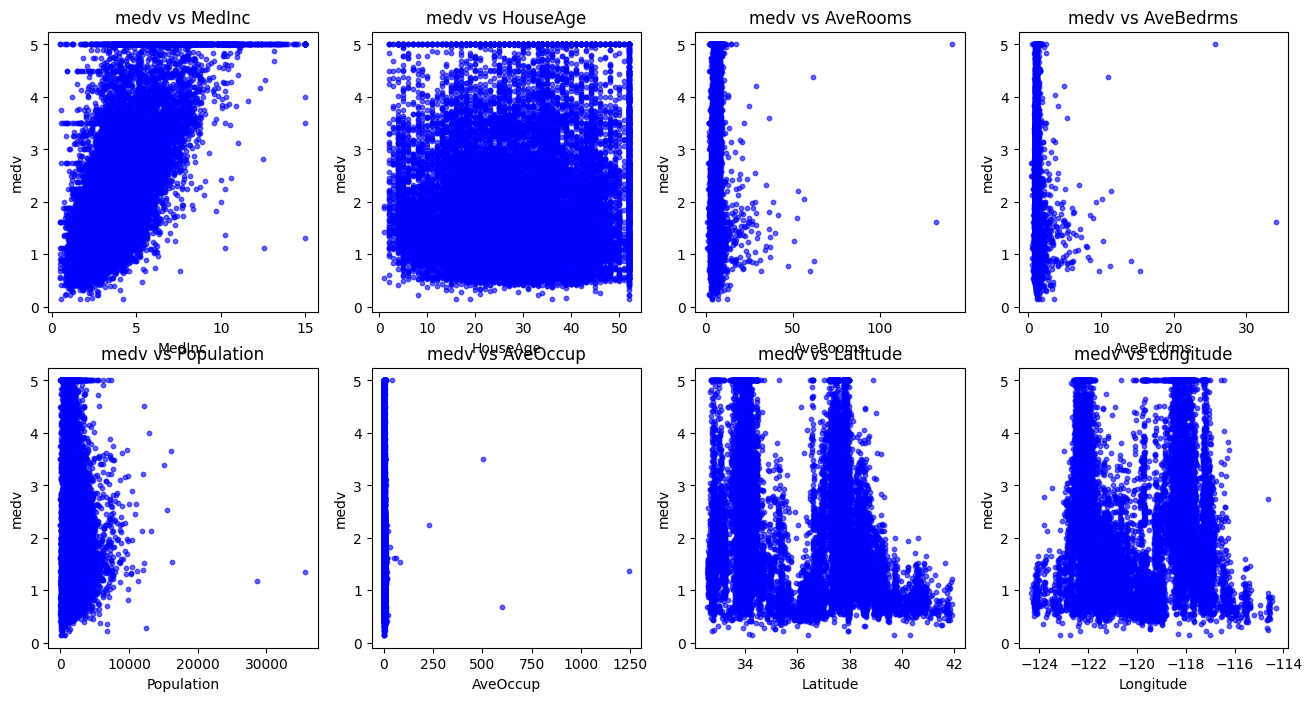

In [7]:
# Gráficos de dispersão
features = dt.columns[:-1]  # Todas as features exceto 'medv'
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(dt[feature], dt['medv'], alpha=0.6, color='blue', s=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('medv')
    axes[i].set_title(f'medv vs {feature}')

<Figure size 640x480 with 0 Axes>

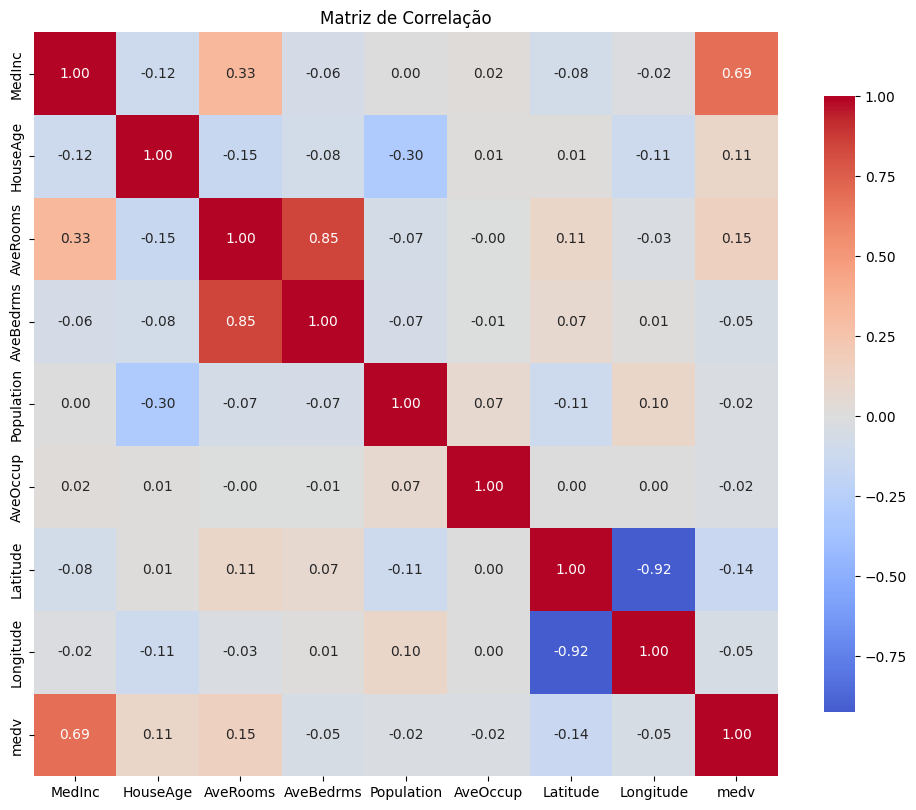

In [8]:
# Remove eixos vazios
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(12, 10))
corr_matrix = dt.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()

In [9]:
# Análises univariadas - regressão linear simples
r2_values = []
for feature in features:
    X = dt[[feature]]
    y = dt['medv']
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    r2_values.append((feature, r2))

r2_df = pd.DataFrame(r2_values, columns=['Variável', 'R2'])
r2_df = r2_df.sort_values('R2', ascending=False)
print("Regressões Lineares Simples:")
print(r2_df.round(4))

Regressões Lineares Simples:
     Variável      R2
0      MedInc  0.4734
2    AveRooms  0.0231
6    Latitude  0.0208
1    HouseAge  0.0112
3   AveBedrms  0.0022
7   Longitude  0.0021
4  Population  0.0006
5    AveOccup  0.0006


In [10]:
# Regressão linear múltipla
X = dt.drop('medv', axis=1)
y = dt['medv']
modelo_lm = LinearRegression()
modelo_lm.fit(X, y)

print("\nRegressão Linear Múltipla:")
print(f"R²: {modelo_lm.score(X, y):.4f}")
print("Coeficientes:")
for feature, coef in zip(X.columns, modelo_lm.coef_):
    print(f"  {feature}: {coef:.4f}")


Regressão Linear Múltipla:
R²: 0.6062
Coeficientes:
  MedInc: 0.4367
  HouseAge: 0.0094
  AveRooms: -0.1073
  AveBedrms: 0.6451
  Population: -0.0000
  AveOccup: -0.0038
  Latitude: -0.4213
  Longitude: -0.4345


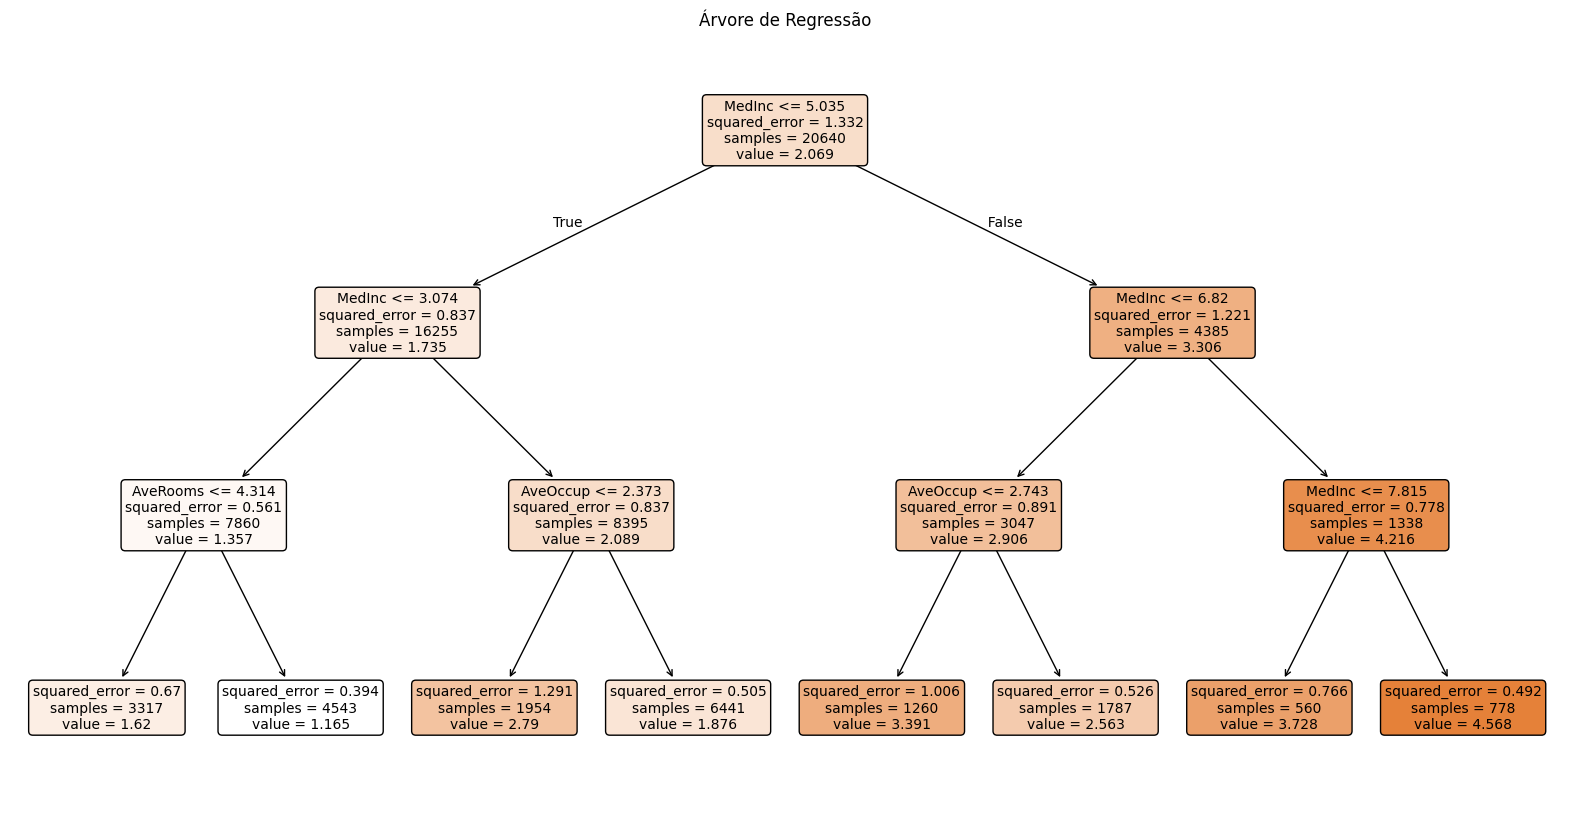

In [11]:
# Árvore de Regressão
modelo_arvore = DecisionTreeRegressor(max_depth=3, random_state=42)
modelo_arvore.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns,
          fontsize=10, rounded=True)
plt.title('Árvore de Regressão')
plt.show()

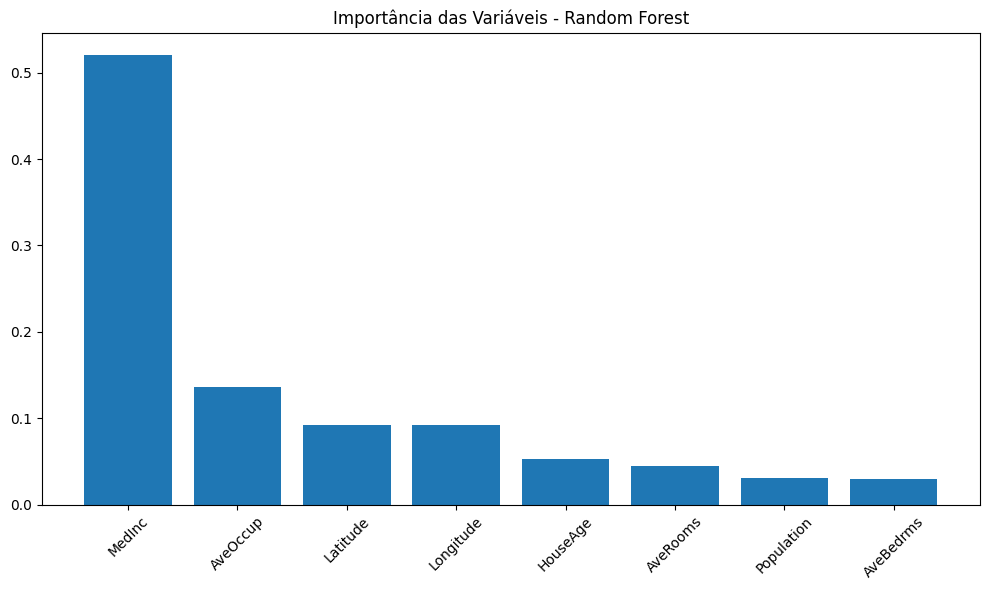

Importância das variáveis (Random Forest):
  MedInc: 0.5200
  AveOccup: 0.1364
  Latitude: 0.0929
  Longitude: 0.0927
  HouseAge: 0.0530
  AveRooms: 0.0445
  Population: 0.0312
  AveBedrms: 0.0293


In [13]:
# Modelo de Random Forests
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X, y)

# Importância das variáveis
importancias = modelo_rf.feature_importances_
indices = np.argsort(importancias)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis - Random Forest')
plt.bar(range(X.shape[1]), importancias[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

print("Importância das variáveis (Random Forest):")
for i in indices:
    print(f"  {X.columns[i]}: {importancias[i]:.4f}")

In [14]:
# Pré-processamento para redes neurais
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

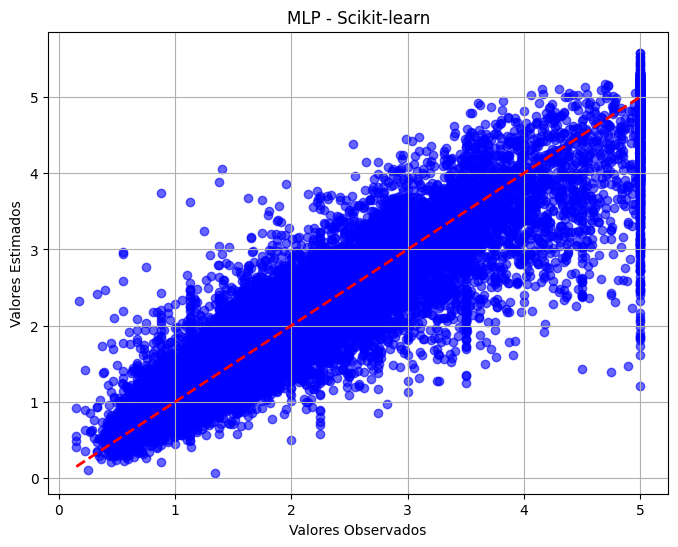

In [15]:
# Modelo de Redes Neurais Artificiais - Scikit-learn
modelo_mlp_sklearn = MLPRegressor(hidden_layer_sizes=(64, 64),
                                  activation='relu',
                                  solver='adam',
                                  max_iter=1000,
                                  random_state=42)
modelo_mlp_sklearn.fit(X_scaled, y_scaled)

y_pred_sklearn_scaled = modelo_mlp_sklearn.predict(X_scaled)
y_pred_sklearn = scaler_y.inverse_transform(y_pred_sklearn_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_sklearn, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Estimados')
plt.title('MLP - Scikit-learn')
plt.grid(True)
plt.show()

645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step


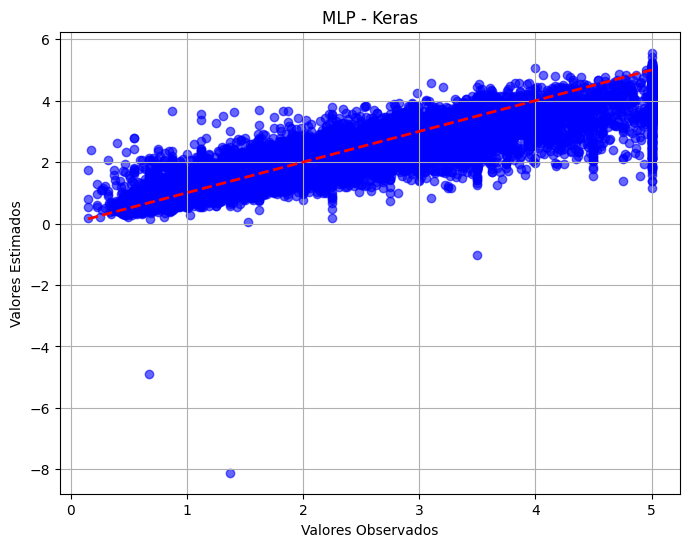

In [16]:
# Modelo de Redes Neurais Artificiais - Keras
model_keras = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model_keras.compile(optimizer='rmsprop',
                   loss='mse',
                   metrics=['mae', 'mse'])

history = model_keras.fit(X_scaled, y_scaled,
                         epochs=100,
                         batch_size=256,
                         verbose=0)

y_pred_keras_scaled = model_keras.predict(X_scaled).flatten()
y_pred_keras = scaler_y.inverse_transform(y_pred_keras_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_keras, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Estimados')
plt.title('MLP - Keras')
plt.grid(True)
plt.show()

In [17]:
# Métricas de avaliação para comparação
modelos = {
    'Regressão Linear': modelo_lm.predict(X),
    'Árvore de Decisão': modelo_arvore.predict(X),
    'Random Forest': modelo_rf.predict(X),
    'MLP Scikit-learn': y_pred_sklearn,
    'MLP Keras': y_pred_keras
}

resultados = []
for nome, pred in modelos.items():
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = 1 - (np.sum((y - pred) ** 2) / np.sum((y - y.mean()) ** 2))
    resultados.append({'Modelo': nome, 'MSE': mse, 'MAE': mae, 'R²': r2})

resultados_df = pd.DataFrame(resultados)
print("\nComparação dos Modelos:")
print(resultados_df.round(4))


Comparação dos Modelos:
              Modelo     MSE     MAE      R²
0   Regressão Linear  0.5243  0.5312  0.6062
1  Árvore de Decisão  0.6204  0.5896  0.5341
2      Random Forest  0.0347  0.1194  0.9740
3   MLP Scikit-learn  0.1996  0.3012  0.8501
4          MLP Keras  0.2583  0.3322  0.8060


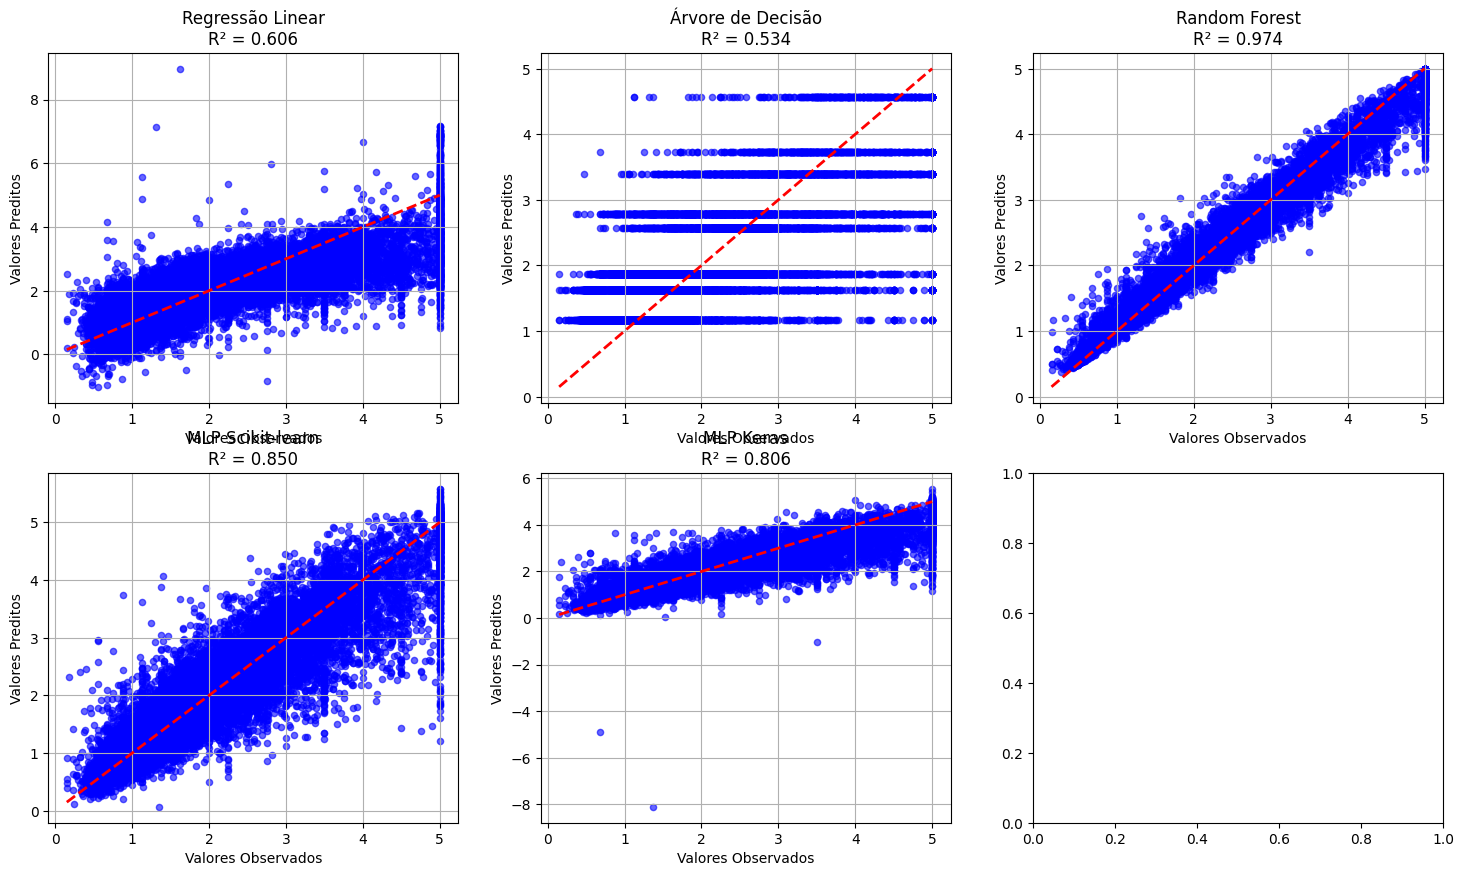

In [18]:
# Gráfico de comparação dos modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (nome, pred) in enumerate(modelos.items()):
    axes[i].scatter(y, pred, alpha=0.6, color='blue', s=20)
    axes[i].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[i].set_xlabel('Valores Observados')
    axes[i].set_ylabel('Valores Preditos')
    axes[i].set_title(f'{nome}\nR² = {resultados[i]["R²"]:.3f}')
    axes[i].grid(True)

In [19]:
# Remove o último subplot vazio se necessário
if len(modelos) < 6:
    fig.delaxes(axes[len(modelos)])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>